# Hyflux point data from netCDF4 output

### Get point data from Hyflux runs using function get_point_map_hyflux.py

In [24]:
%load_ext pypath_magic
%pypath

The pypath_magic extension is already loaded. To reload it, use:
  %reload_ext pypath_magic
0. /home/critechuser/StormS/src
1. /DATA/critechuser/REPOS/StormS/Jupyter/src
2. /DATA/critechuser/REPOS/StormS/DELFT3D


In [25]:
%%skip
%pypath -a ../DELFT3D/
%pypath

In [1]:
import pandas
from get_point_map_hyflux import hget

In [2]:
%matplotlib notebook

In [3]:
OFILE='/mnt/pandora/Projects_Critech/EX_2015_CoastAlRisk/maps/data/s_b_data.txt'

In [4]:
obs=pandas.read_csv(OFILE,delimiter='\t')

In [5]:
obs

,ID,NAME,latobs,lonobs,latcalc,loncalc
0,1630,Almeira,36.8300,-2.4800,36.72506,-2.468386
1,1706,Valencia,39.4400,-0.3100,39.44040,-0.299000
2,819,Barcelona,41.3400,2.1600,41.27749,2.213909
3,1461,Palma de Mallorca,39.5600,2.6380,39.39457,2.614552
4,1741,Sete,43.3976,3.6991,43.31857,3.761195
5,1500,Corsica,42.9670,9.3500,43.09528,9.267036
6,1841,Carloforte,39.1480,8.3095,39.22599,8.231240
7,1848,Imperia,43.8783,8.0189,43.83057,8.149480
8,1846,Genova,44.4101,8.9255,44.32259,8.919400
9,1843,Civitavecchia,42.0940,11.7896,41.99920,11.677270


In [6]:
PATH='/mnt/ECMWF/processed/2015/FIX_MED_SEA/'  # NEW ECMWF

In [7]:
#SELECT POINT
point=14

In [8]:
plat,plon=obs['latcalc'][point],obs['loncalc'][point]

In [9]:
t0='20150101.00'

In [10]:
t1='20150104.12'

In [11]:
t,h = hget(t0,t1,PATH,plat,plon)

20150101.00  > restart date : 2015-01-01 00:00:00
20150104.12

In [12]:
res=pandas.DataFrame(h,index=[t],columns=[obs['NAME'][point].strip()+'  netCDF'])

<IPython.core.display.Javascript object>


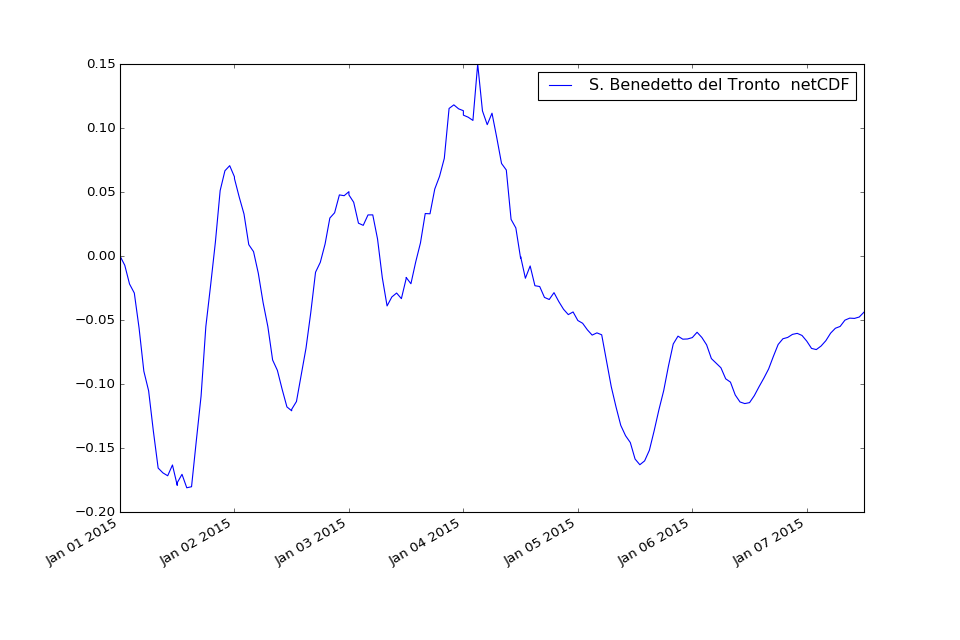

In [13]:
ax = res.plot(figsize=(12,8))

In [39]:
## with TIFF reading

In [40]:
from get_point_map_hyflux2 import hget

In [41]:
t,h = hget(t0,t1,PATH,plat,plon)

20150101.00  > restart date : 2015-01-01 00:00:00
20150104.12

In [42]:
resT=pandas.DataFrame(h,index=[t],columns=[obs['NAME'][point].strip()+'  TIF'])

<IPython.core.display.Javascript object>


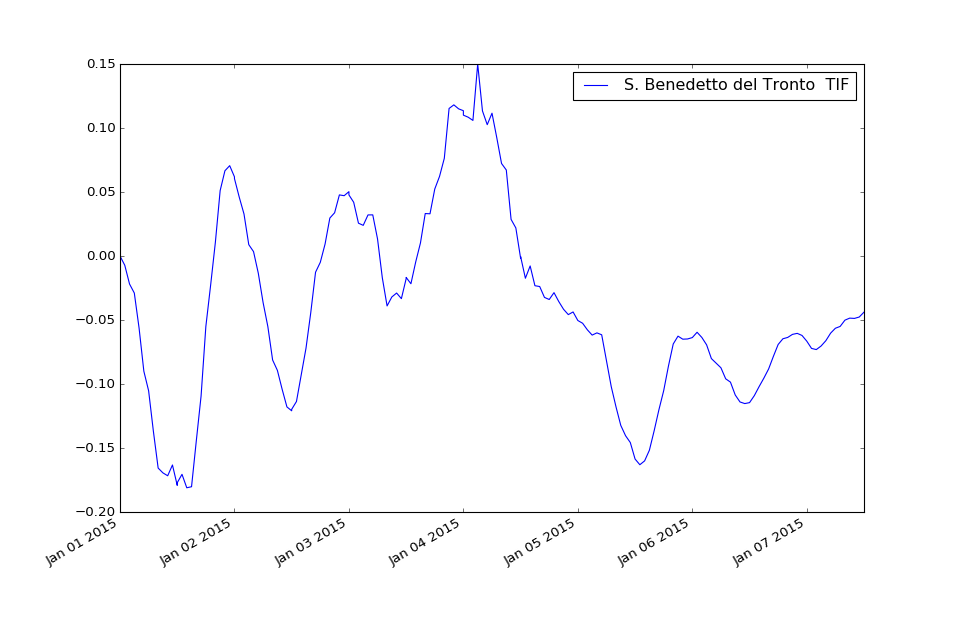

In [43]:
ax = resT.plot(figsize=(12,8))

<IPython.core.display.Javascript object>


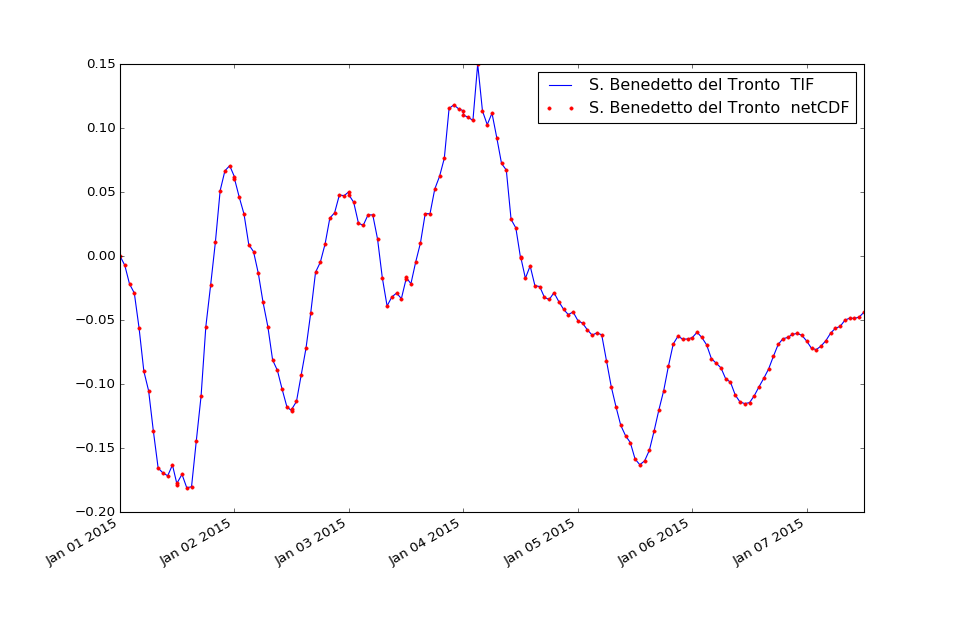

In [44]:
#plot both
ax1 = resT.plot(figsize=(12,8))
res.plot(ax=ax1,color='red', linestyle='', marker='.')

In [45]:
#SAVEPATH='tmp/'#/mnt/pandora/Users_Critech/Thomas/HYFLUX/'

In [46]:
#res.to_csv(SAVEPATH+obs['NAME'][point].strip()+'.csv', header=None)